In [1]:
import pandas as pd
import requests
import bs4
import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/sidaqin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sidaqin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sidaqin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
wiki = "https://en.wikipedia.org/wiki/List_of_pop_musicians_who_died_of_drug_overdose"
page = requests.get(wiki)
soup = BeautifulSoup(page.content,'html.parser')
names = set()
tables = soup.findAll(name='table', class_='wikitable sortable')


for table in tables:
    body = table.findChild("tbody" , recursive=False)
    for row in body.findAll('tr'):
        cells = row.findAll('a')
        if(len(cells) == 0) :continue
        names.add(cells[0].text.strip())

In [3]:
names

{'Alan Wilson',
 'Allen Woody',
 'Amy Winehouse',
 'Andrew Wood',
 'Billy Mackenzie',
 'Billy Murcia',
 'Bobby Hatfield',
 'Bobby Sheehan',
 'Bon Scott',
 'Bradley Nowell',
 'Brent Mydland',
 'Brian Cole',
 'Carl Crack',
 'Chris Cornell',
 'Chris Kelly',
 'Danny Whitten',
 'Darby Crash',
 'Dave Brockie',
 'Dave Rubinstein',
 'Dave Schulthise',
 'David McComb',
 'David Ruffin',
 'Dee Dee Ramone',
 'Dickie Pride',
 'Dinah Washington',
 'Dwayne Goettel',
 'Erik Brødreskift',
 'Esther Phillips',
 'Frankie Lymon',
 'GG Allin',
 'Gary Holton',
 'Gary Moore',
 'Gary Thain',
 'Gerry Rafferty',
 'Gidget Gein',
 'Gram Parsons',
 'Gregory Herbert',
 'Hillel Slovak',
 'Hollywood Fats',
 'Howie Epstein',
 'Ike Turner',
 'Iosu Expósito',
 'James Honeyman-Scott',
 'Jani Lane',
 'Janis Joplin',
 'Jason Molina',
 'Jay Bennett',
 'Jay Reatard',
 'Jeremy Michael Ward',
 'Jesse Ed Davis',
 'Jim Morrison',
 'Jimi Hendrix',
 'Jimi Jamison',
 'Jimmy McCulloch',
 'John Baker Saunders',
 'John Belushi',
 'John

In [4]:
len(names)

112

In [5]:
page = requests.get("https://drugabuse.com/30-famous-musicians-who-have-battled-drug-addiction-and-alcoholism/")
soup = BeautifulSoup(page.content,'html.parser')
for entry in soup.findAll("h2"):
    try:
        names.add(entry.text.split(".",1)[1].strip())
    except:
        break
    

In [6]:
print(len(names))
namesPD = pd.DataFrame(data={"Band": list(names)})

138


In [7]:
songsTable1 = pd.read_csv("lyrics/lyrics1.csv")

In [8]:
songsTable1.head()

,Band,Lyrics,Song
0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday
1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die
2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside
3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot
4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds


In [9]:
pd1= songsTable1.merge(namesPD, how="inner", on="Band")
pd2= songsTable1[songsTable1['Band'].isin(names)]

In [10]:
print(len(pd1))
print(len(pd2))


#This is just to show that these are the the same frames, that the two methods in the above cells do that same thing
pd1.sort_values(by=["Band",'Lyrics','Song'],inplace=True)
pd2.sort_values(by=["Band",'Lyrics','Song'],inplace=True)

pd2.reset_index(drop=True,inplace=True)
pd1.reset_index(drop=True,inplace=True)

print(pd2.equals(pd1))

2673
2673
True


/Users/sidaqin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [11]:
pd2[pd2.duplicated(keep=False)]
pd1[pd1.duplicated(keep=False)]

#there are duplicates, need to drop later

,Band,Lyrics,Song
1989,Ray Charles,For all we know\r\nWe may never meet again\r\n...,For All We Know
1990,Ray Charles,For all we know\r\nWe may never meet again\r\n...,For All We Know


In [12]:
songsTable2 = pd.read_csv("lyrics/lyrics2.csv")
pd3= songsTable2.merge(namesPD, how="inner", on="Band")
pd4= songsTable2[songsTable2['Band'].isin(names)]
pd3.sort_values(by=["Band",'Lyrics','Song'],inplace=True)
pd4.sort_values(by=["Band",'Lyrics','Song'],inplace=True)

pd3 = pd3.reset_index(drop=True)
pd4 = pd4.reset_index(drop=True)

print(pd3.equals(pd4))
pd3[pd3.duplicated(keep='first')]
pd4[pd4.duplicated(keep='first')]

True


/Users/sidaqin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Band,Lyrics,Song


In [13]:
len(pd3)


4036

In [14]:
len(pd4)

4036

In [15]:
pd3.head()

,Band,Lyrics,Song
0,Amy Winehouse,All I can ever be to you is a darkness that we...,Tears Dry on Their Own [Clean Version]
1,Amy Winehouse,All I can ever be to you is a darkness that we...,Tears Dry on Their Own [DVD]
2,Amy Winehouse,All I can ever be to you is a darkness that we...,Tears Dry on Their Own
3,Amy Winehouse,"Attracts me, till it hurts to concentrate,\r\n...",Amy Amy Amy
4,Amy Winehouse,"Attracts me, till it hurts to concentrate,\r\n...",Amy Amy Amy (Outro)


In [16]:
pd2.head()

,Band,Lyrics,Song
0,Amy Winehouse,"All I can ever be to you,\r\nIs a darkness tha...",Tears Dry [Original Version]
1,Amy Winehouse,Build your dreams to the stars above\r\nBut wh...,Don't Go To Strangers [Multimedia Track]
2,Amy Winehouse,I can't wait to get away from you\r\nUnsurpris...,"Best Friends, Right?"
3,Amy Winehouse,I can't wait to get away from you\r\nUnsurpris...,"Best Friends, Right? [Leicester Summer Sundae ..."
4,Amy Winehouse,I would die before I divorce you\r\nI'd take a...,Between the Cheats


In [17]:
pd5 = pd.concat([pd1,pd3])

In [18]:
pd5

,Band,Lyrics,Song
0,Amy Winehouse,"All I can ever be to you,\r\nIs a darkness tha...",Tears Dry [Original Version]
1,Amy Winehouse,Build your dreams to the stars above\r\nBut wh...,Don't Go To Strangers [Multimedia Track]
2,Amy Winehouse,I can't wait to get away from you\r\nUnsurpris...,"Best Friends, Right?"
3,Amy Winehouse,I can't wait to get away from you\r\nUnsurpris...,"Best Friends, Right? [Leicester Summer Sundae ..."
4,Amy Winehouse,I would die before I divorce you\r\nI'd take a...,Between the Cheats
5,Amy Winehouse,I've been so many places in my life and time\r...,A Song for You
6,Amy Winehouse,Lent you outsiders and my new Badu\r\nWhile yo...,You Sent Me Flying [Demo] [Original Demo]
7,Amy Winehouse,"My heart is sad and lonely\nFor you I sigh, fo...",Body & Soul
8,Amy Winehouse,Nobody stands in between me and my man\r\nIt's...,Me & Mr Jones [Multimedia Track]
9,Amy Winehouse,Our day will come (our day will come)\r\nAnd w...,Our Day Will Come


In [19]:
#Cleaning the remixes
def getRidOfBrackets(input):
    return re.sub("[\(\[].*?[\)\]]", "", input).strip()
    
    
pd5["Song"] = pd5["Song"].apply(getRidOfBrackets)
pd5 = pd5.drop_duplicates(subset='Song', keep='first')

In [20]:
stop = stopwords.words('english')

In [21]:
pd5['Lyrics'] = pd5['Lyrics'].str.lower()
pd5['Lyrics'] = pd5['Lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

/Users/sidaqin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sidaqin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
pd5['Lyrics'] = pd5['Lyrics'].str.replace('[^\w\s]','')

/Users/sidaqin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
pd5

,Band,Lyrics,Song
0,Amy Winehouse,ever you darkness knew regret get accustomed t...,Tears Dry
1,Amy Winehouse,build dreams stars need someone love go strang...,Don't Go To Strangers
2,Amy Winehouse,cant wait get away unsurprisingly hate communi...,"Best Friends, Right?"
4,Amy Winehouse,would die divorce id take thousand thumps love...,Between the Cheats
5,Amy Winehouse,ive many places life time ive sung lot songs i...,A Song for You
6,Amy Winehouse,lent outsiders new badu thinking clue tough so...,You Sent Me Flying
7,Amy Winehouse,heart sad lonely sigh dear seen im you body so...,Body & Soul
8,Amy Winehouse,nobody stands man mr jones me mr jones kind sh...,Me & Mr Jones
9,Amy Winehouse,day come our day come well everything well sha...,Our Day Will Come
10,Amy Winehouse,simple sweet guitar humbled bass beat kicks ev...,Halftime


In [24]:
si = SentimentIntensityAnalyzer()
scores = [];
for song in pd5["Lyrics"]:
    result = si.polarity_scores(song)
    score = result["compound"]
    scores.append(score)
pd5.insert(3, "score",scores, True)

In [25]:
sentimentScores = pd5.groupby(["Band"]).mean()
sentimentScores

,score
Band,
Amy Winehouse,0.330705
Billy Mackenzie,0.991200
Bob Marley,0.341659
Bobby Brown,0.644654
Bon Scott,0.190650
Brian Wilson,0.554533
Britney Spears,0.442178
Chris Cornell,0.052960
David Bowie,0.154884


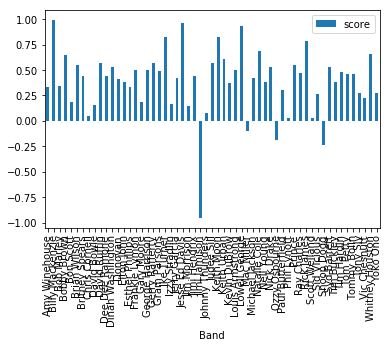

In [29]:
sentimentScores.plot.bar()
#Jimi Jamison with low low score

In [27]:
# concatenate all lyrics for each artist
def concat_(col):
    return "".join(col)
df = pd5.loc[:,['Band','Lyrics']].groupby(['Band']).aggregate(concat_)

In [28]:
word_counts = []
for lyrics in df['Lyrics']:
    word_count =  pd.Series(lyrics.split()).value_counts()
    word_counts.append(word_count)
df.insert(1, "word count", word_counts, True)
df

,Lyrics,word count
Band,,
Amy Winehouse,ever you darkness knew regret get accustomed t...,im 102 love 100 know ...
Billy Mackenzie,love me love me say let fly away love like win...,living 13 paradise 12 lives ...
Bob Marley,whooooooo mr brown mr brown clown rides town c...,love 420 yeah 410 got ...
Bobby Brown,ah ah ah things aint way used back day man mea...,girl 193 love 186 baby ...
Bon Scott,aint necessarily aint necessarily tings dat yo...,sookie 24 hang 18 baby...
Brian Wilson,s wonderful s marvelous care s awful nice s pa...,la 209 im 156 love...
Britney Spears,ladies gentlemen interrupt program dance music...,oh 786 im 642 baby ...
Chris Cornell,start another day together million miles us tr...,im 100 know 93 li...
David Bowie,hey aint over me hope im crazy feel driving wh...,oh 577 im 562 love ...
